<a href="https://colab.research.google.com/github/aguaranguay/se-ales/blob/master/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taller 1**
Alejandro Guaranguay 818037


#**2. Conceptos Básicos de Señales**
#**i)**
Evaluar la expresión
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \delta\left(2 t - 2 \pi\right)dt \rightarrow 1$$
Nota: Consultar las propiedas de selectividad y escala en el
tiempo de la funcion impulso unitario. Comprobar el resultado en simulacion con la librería SymPy.




##Solución
Teniendo en cuenta las propiedades de la función delta de Dirac se tiene que:
$$\int_{-\infty}^{\infty}f(t) \delta\left(t - t_o\right)dt = f(t_o) \rightarrow 2 $$



$$\delta\left(at - t_o\right) = \mid a \mid^{-1}\delta(x-\frac{t_o}{a}) \rightarrow 3 $$ 

Tomando $\delta\left(2 t - 2 \pi\right)$ de la Ecuacion 1 y aplicándo propiedades de la Ecuacion 3 se tiene:

$$\delta\left(2 t - 2 \pi\right) = \frac{1}{2}\delta(t-\pi) $$
Reemplazando en la ecuación 1:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt $$
Ahora, aplicando la propiedad de la ecuación 2:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt = \frac{1}{2}\pi^2e^{-sin(\pi)}cos(2\pi) = \frac{\pi^2}{2} $$

##Simulación 1

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t = sp.symbols('t', real = True)
d = sp.DiracDelta((2*t)-2*(sp.pi))
x = (t**2)*(sp.exp(-(sp.sin(t))))*(sp.cos(2*t))

xi = x*d
xii = sp.integrate(xi,(t,-(sp.oo),sp.oo))
xii

$$\frac{\pi^{2}}{2}$$


#**ii)**
Sea $$x(t) = u(t- t_o)- u(t- nt_o)- k\delta (t- mt_o).$$ Determine
el valor de $k$ para el cual $$\int_{-\infty}^{\infty}{x(t)}dt = 0 $$ Comprobar el
resultado en simulacion con la librería SymPy.

##Solución
Hacemos:
$$a = u(t- t_o)- u(t- nt_o)$$ 
y
$$ b = k\delta (t- mt_o)$$
entonces:
$$x(t) = a-b$$
Por lo tanto:
\
$$\int_{-\infty}^{\infty}{x(t)}dt = \int_{-\infty}^{\infty}adt-\int_{-\infty}^{\infty}bdt = 0$$ 
\
Resolviendo $\int_{-\infty}^{\infty}adt$ :
$$\int_{-\infty}^{\infty}adt = \int_{-\infty}^{\infty}u(t- t_o)- u(t- nt_o)dt = \int_{t_o}^{nt_o}dt = \mid nt_o-t_o\mid = \mid t_o(n-1) \mid$$
\
Y resolviendo 
$\int_{-\infty}^{\infty}bdt$ :
$$\int_{-\infty}^{\infty}bdt = \int_{-\infty}^{\infty}k\delta (t- mt_o) = k$$
\
Entonces:
$$\mid nt_o-t_o\mid-k = 0$$
\
$$k = \mid t_o(n-1) \mid$$

##Simulación 2

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t, to, n, k, m = sp.symbols('t to n k m', real = True)
ai = sp.integrate(1,(t,to,n*to))
ai


$$n to - to$$





In [0]:
b = k*sp.DiracDelta(t-m*to)
bi = sp.integrate(b,(t,-(sp.oo),sp.oo))
bi

$$k$$

In [0]:
ec = sp.Eq(ai-bi,0)
sp.solve(ec,k)

Resolviendo para k:
$$k = \left [ to \left(n - 1\right)\right ]$$

#**iii)**
Consulte en que consisten las señales cuasiperiódicas. Luego, demuestre la periodicidad o no de las siguientes señales:

*   $x(t) = 3 cos(\omega  t)$
*   $x(t) = 2 sin(\omega  t + \pi )$
*   $ x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) -  2 cos(t/\sqrt{3})$
*   $ x(t) = 3 sin(4t) -  2 cos(50t) + 2 cos(10t)$
*   $x(t) = e^{j\omega  t}$

Grafique cada una de las senales anteriores en Python utilizando arreglos de numpy (dibuje tres periodos si es el caso).

##Desarrollo




##• $x(t) = 3 cos(\omega  t)$
\
Se hace $x(t+T)$ 
$$x(t+T)= 3 cos(\omega(t+T))$$
\
$$3cos(\omega(t+T))=3[cos(\omega t)cos(\omega T)-sen(\omega t)sen(\omega T)]$$
Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$
$$3cos(\omega(t+T))=3[cos(\omega t)cos(\frac{2\pi}{T}T )-sen(\omega t)sen(\frac{2\pi}{T} T)]$$
$$3cos(\omega(t+T))=3[cos(\omega t)1-0]$$
$$3cos(\omega(t+T))=3[cos(\omega t)]$$ 

por lo tanto $x(t) = 3 cos(\omega  t) = 3cos(\omega  (t+T)) = x(t) = 3 cos(\omega  t)$ es periódica

###**Gráfico**

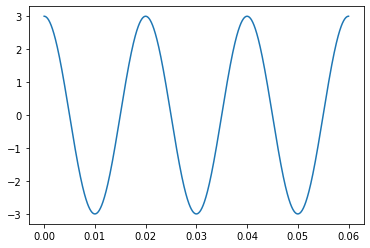

In [0]:
import numpy as np
import matplotlib.pyplot as plt
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 3*np.cos(w*t)
plt.plot(t,x)

##• **$x(t) = 2 sin(\omega  t + \pi ) = -2sin(\omega t)$**
\
Se hace $x(t+T)$
$$x(t+T) = -2sin(\omega (t+T) )$$
\
$$-2sin(\omega (t+T)) = -2[sin(\omega (t))cos(\omega(T))+sin(\omega(T))cos(\omega(t)]$$
\
Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$
\
$$-2sin(\omega (t+T)) = -2[sin(\omega t)cos(\frac{2\pi}{T}T)+sin(\frac{2\pi}{T}T)cos(\omega t)]$$
$$-2sin(\omega (t+T)) = -2[sin(\omega t)1+0]$$
$$-2sin(\omega (t+T)) = -2sin(\omega t)$$
\
Por lo tanto $x(t) = -2 sin(\omega  t)  = -2sin(\omega(t+T)) = -2sin(\omega t) $ es periódica



###**Gráfico**

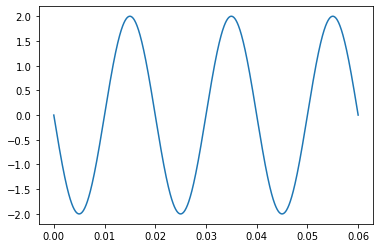

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 2*np.sin(w*t+np.pi)
plt.plot(t,x)

##•$ x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t)-2 cos(t/\sqrt{3})$
\
Revisando $\omega $ para cada señal se observa como hay $\sqrt{3}$, por lo tanto la función no es cuasiperiódica porque sus $\omega $ no son números enteros.


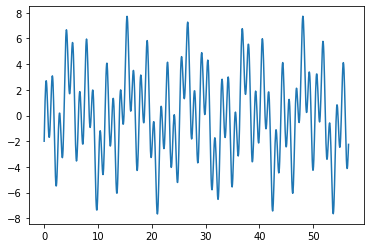

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 6*np.pi
t = np.linspace(0,3*T,1000)
x = 3*np.sin(np.sqrt(3)*t)+3*np.sin(5*t)-2*np.cos(t/np.sqrt(3))
plt.plot(t,x)

##•$ x(t) = 3 sin(4t) -  2 cos(50t) + 2 cos(10t)$
\
Se hace $\omega_1 = 4, \omega_2 = 50, \omega_3 = 10$
\
\
$\frac{\omega_1}{\omega_2}, \frac{\omega_2}{\omega_3}, \frac{\omega_3}{\omega_1}
$ 
\
\
$\frac{4}{50} , \frac{50}{10}, \frac{10}{4}$ son entero sobre entero, entonces la funcion es cuasiperiódica
\
\
Se encuentran los periodos:
\
\
$T_1 = \frac{\pi}{2}; T_2 = \frac{\pi}{25}; T_3 = \frac{\pi}{5}$
\
\
$$T_1k_1=T_2k_2=T_3k_3=T$$
\
\
$$ \frac{\pi}{2}k_1 = \frac{\pi}{25}k_2 = \frac{\pi}{5}k_3 = T$$
\
Se multiplica por $50$ y se divide entre $\pi$, teniendo que encontrar el mcm de 25, 2, 10 el cuál es ***50***.
\
Ahora, con la expresión: 
\
$$25k_1=2k_2=10k_3=50$$ se obtiene los valores de $k_1,k_2$ y $k_3$
\
$k_1 = 2$
\
$k_2 = 25$
\
$k_3 = 5$
\
Al reemplazar: $$2\frac{\pi}{2} = 25\frac{\pi}{25} = 5\frac{\pi}{5} = T$$
\
$$T = \pi$$



###**Gráfico**

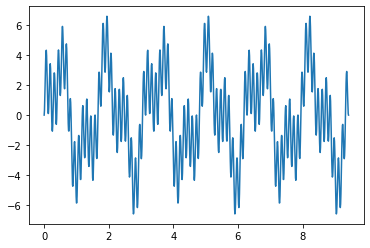

In [0]:
T = np.pi
N = 1000
t = np.linspace(0,3*T,N)
x = 3*np.sin(4*t) - 2*np.cos(50*t) + 2*np.cos(10*t)
plt.plot(t,x)

##• $x(t) = e^{j\omega  t}$
\
Se convierte la funcion en senos y cosenos complejos:
\
$$x(t) = e^{j\omega  t} = Cos(\omega t) + j Sen (\omega t)$$
\
Se hace $x(t-T)$
\
$$x(t-T) = e^{j\omega  (t-t)} = Cos(\omega (t-T)) + j Sen (\omega (t-T))$$
\
$$x(t-T) = [Cos(\omega t) Cos(\omega T)+Sen (\omega t)Sen (\omega T)] + j [Sen (\omega t)Cos(\omega T)-Cos(\omega t)Sen (\omega T)]$$
\
Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$
\
$$x(t-T) = [Cos(\omega t) Cos(\frac{2\pi}{T} T)+Sen (\omega t)Sen (\frac{2\pi}{T} T)] + j [Sen (\omega t)Cos(\frac{2\pi}{T} T)-Cos(\omega t)Sen (\frac{2\pi}{T} T)]$$
\
$$x(t-T) = [Cos(\omega t) 1+0] + j [Sen (\omega t)1-0]$$
\
$$x(t-T) = e^{j\omega  (t-t)} = Cos(\omega t) + j Sen (\omega t)$$



/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


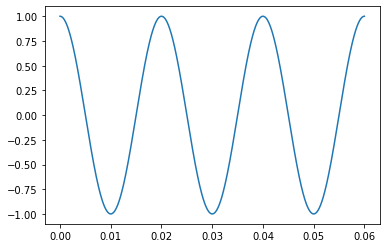

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = np.exp(w*(0+1j)*t)
plt.plot(t,x)

#**3. Senales de energía y potencia**

# Clasifique segun su tipo (energía o potencia):
\
•$x(t) = - 3t + 1; ∀t ∈ [0, 5]$
\
•$x(t) = A cos(\omega  t) + B sin(\omega  t); A, B, \omega   ∈ \mathbb{R}^+$
\
•$x(t) = ate^{- tk} (u(t) -  u(t -  t_o)) ; a, k∈\mathbb{R}; t_o > 0$
\
•$x[n] = nu[n]; n ∈ {0, ±1, ±2, . . . , ±N}$
\
•$x[n] = cos[n\pi ] + sin[2n\pi /3]; n ∈ {0, 1, . . . , N}; N ∈ \mathbb{N}$
\
•$x[n] = A cos[n\pi ]u[n -  n_o]; A ∈ \mathbb{R}^+$ y $n ∈ {0 ±1, ±2, . . . , ±N}; 0 < n_o < N$

#**•$x(t) = - 3t + 1; ∀t ∈ [0, 5]$**
\
Con la ecuacion de energía:
\
$$Ex = \int_{T} {\mid x(t)\mid}^{2}dt $$
\
Hallamos la energía de la función:
\
$$Ex = \int_{0}^{5} {\mid(-3t+1)\mid}^{2}dt  $$
\
$$Ex = \int_{0}^{5} {\mid(9t^2-6t^2+1)\mid}dt  $$
\
$$Ex = \int_{0}^{5} {9t^2} dt- \int_{0}^{5} {6t^2} dt+ \int_{0}^{5} {1}dt  $$
\
$$Ex = \frac{9t^3}{3}\Big|_0^5 -\frac{6t^2}{2}\Big|_0^5 + t \Big|_0^5  $$
\
$$Ex = 375 -75 +5 = 305 $$
\
Como $ Ex= 305 \rightarrow 0 < 305 < \infty $ La señal es de energia.


In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t= sp.symbols('t', real = True)
a= (sp.Abs(3*t-1))**2
ai = sp.integrate(a,(t,0,5))
ai

$$305$$

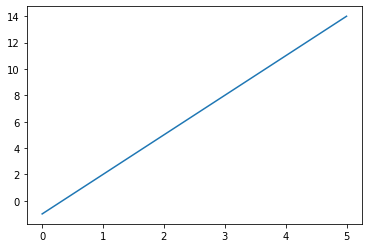

In [0]:
t90 = np.linspace(0,5,1000)
x = 3*t90-1
plt.plot(t90,x)

#**•$x(t) = A cos(\omega  t) + B sin(\omega  t); A, B, \omega   ∈ \mathbb{R}^+$**
\
Con la ecuacion de energía:
\
$$E_x = \int_{T} {\mid x(t)\mid}^{2}dt $$
\
Hallamos la energía de la función:
\
$$E_x = \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} {\mid(A cos(\omega  t) + B sin(\omega  t))\mid}^{2}dt \rightarrow T_0 = \frac{2 \pi}{\omega}   $$
\
$$E_x = \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} {\mid(A^2 cos^2(\omega  t) + 2AB sin(\omega  t)cos(\omega  t)+sin^2(\omega  t))\mid}dt  $$
\
$$E_x = A^2 \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}}  cos^2(\omega  t) dt + 2AB  \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} sin(\omega  t)cos(\omega  t) dt + B^2 \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}}  sin^2(\omega  t)dt  $$
\
$$E_x =  [\frac{A^2}{2}t+\frac{A^2}{4 \omega}\sin (2\omega t)) ]\Big|_{-\frac{T_0}{2}}^{\frac{T_0}{2}} -[\frac{AB}{2 \omega}\cos (2 \omega t) ]\Big|_{-\frac{T_0}{2}}^{\frac{T_0}{2}}  +  [\frac{B^2}{2}t+\frac{B^2}{4 \omega}\sin (2\omega t)) ]\Big|_{-\frac{T_0}{2}}^{\frac{T_0}{2}}$$
\
$$E_x = \frac{A^2}{2}T_0 + \frac{B^2}{2}T_0 = \frac{T_0}{2}(A^2 + B^2)$$
\
$$ E_x = \lim_{T_0 \to \infty} \frac{T_0}{2}(A^2 + B^2) = \infty$$
\
• El límite va hacia el infinito, entonces $x(t)$ no es de energía.
\
\
Ahora con la ecuacion de potencia:
\
$$P_x = \frac{E_x}{T_0} $$
\
Calculamos la potencia:
\
$$P_x = \frac{ \frac{T_0}{2}(A^2 + B^2)}{T_0} $$
\
$$P_x = \frac{ (A^2 + B^2)}{2} $$
\
$$P_x = \lim_{T_0 \to \infty}  \frac{ (A^2 + B^2)}{2} = \frac{ 1}{2}(A^2 + B^2)< \infty $$
\
La señal $x(t)$ es de potencia

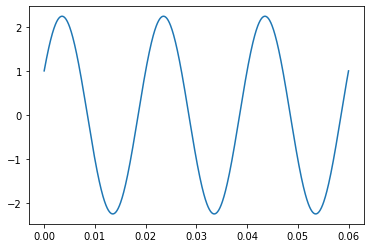

In [26]:
import numpy as np
import matplotlib.pyplot as plt
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
A=2
B=1
x = A*np.sin(w*t)+B*np.cos(w*t)

plt.plot(t,x)


#**•$x(t) = ate^{- tk} (u(t) -  u(t -  t_o)) ; a, k∈\mathbb{R}; t_o > 0$**#
\
Con la ecuacion de energía:
\
$$E_x = \int_{T} {\mid x(t)\mid}^{2}dt $$
\
Hallamos la energía de la función:
\
$$E_x = \int_{-\infty}^{\infty} {\mid(ate^{- kt} (u(t) -  u(t -  t_o)))\mid}^{2}dt $$
\
$$E_x = \int_{0}^{t_o} {\mid ate^{- kt} \mid}^{2}dt $$
\
$$E_x = \int_{0}^{t_o} a^2 t^2 e^{- 2kt} dt $$
\
$$E_x = a^2[-\frac{t^2}{2k}e^{-2kt} - \frac{t}{2k^2}e^{-2kt}- \frac{1}{2k^2}e^{-2kt} ] \Big|_{0}^{t_o} $$
\
$$E_x = [-\frac{a^2e^{-2kt}\left(2k^2t^2+2kt+1\right)}{4k^3}] \Big|_{0}^{t_o} $$
\
$$ E_x = -\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3}$$
\
$$ E_x = \lim_{t_o \to \infty}-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} =   
\begin{cases} \frac{a^2}{4k^3}  & \text{para}\: K > 0 \\\ \infty & \text{para}\: K < 0 \end{cases}
$$
\
\
•Por lo tanto para $k>0$ la señal $x(t)$ es de energía
\
• Y para $k<0$ la señal $x(t)$ no es de energía
\
\
Ahora con la ecuacion de potencia:
\
$$P_x = \frac{E_x}{T_0} $$
\
Calculamos la potencia:
$$P_x =  -\frac{1}{t_o} \frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3}$$
\
$$P_x = \lim_{t_o \to \infty} -\frac{1}{t_o} \frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} =
\begin{cases} 0  & \text{para}\: K > 0 \\\ \infty & \text{para}\: K < 0 \end{cases}
 $$
 \
 •Por lo tanto para $k>0$ la señal $x(t)$ es de energía.
\
• Y para $k<0$ la señal $x(t)$ no es de energia ni de potencia.



/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


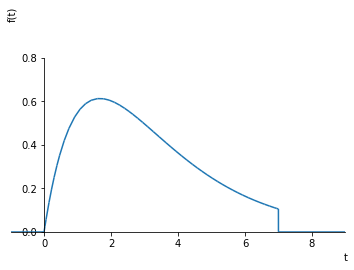

In [41]:
import sympy as sp
from sympy import init_printing
init_printing()
t,a = sp.symbols('t a', real = True)
to = sp.symbols('to', positive = True)
k = sp.symbols('k',positive = True)
f = a*t*sp.exp(-t*k)*(sp.Heaviside(t)-sp.Heaviside(t-to))
sp.plot(f.subs({a: 1, k : .6, to : 7}),(t,-1,9))
f